# Interactive Dashboard

## Congressional Data

The congress doesn't seem to publish their own data API: https://www.congress.gov/about/data. Bulk data for download are available

### ProPublica Data Store

ProPublica is an American nonprofit organization based in New York City. It is a nonprofit newsroom that aims to produce investigative journalism in the public interest. [Wikipeda](https://en.wikipedia.org/wiki/ProPublica)

ProPublica won multiple [Pulitzer Prize for Investigative Reporting](https://en.wikipedia.org/wiki/Pulitzer_Prize_for_Investigative_Reporting)

* In 2010, "The Deadly Choices At Memorial": a story of exhausted doctors when they were cut off by the floodwaters of Hurricane Katrina.

* In 2011, "The Wall Street Money Machine". This was the first time a Pulitzer was awarded to a group of stories not published in print.

* In 2016, Explanatory Reporting, in collaboration with The Marshall Project: an examination of law enforcement's failures to investigate reports of rape properly and to comprehend the traumatic effects on its victims

* In 2017, Public Service for a series of reports on the use of eviction rules by the New York City Police Department.

Propublica publishes extensive datasets used for their reporting: https://www.propublica.org/datastore/. Some examples:

* [Trump Administration](https://www.propublica.org/datastore/collection/trump-administration)

* [Education](https://www.propublica.org/datastore/datasets/education)

* [Health](https://www.propublica.org/datastore/datasets/health)

Some are free, some are not

## Sunlight Congress Data

Another data source that looks promising is here: https://sunlightlabs.github.io/congress/

In [1]:
!pip install python-congress

     |████████████████████████████████| 102kB 6.3MB/s ta 0:00:011


In [2]:
!git clone https://github.com/eyeseast/propublica-congress
!cd propublica-congress && python setup.py install

Cloning into 'propublica-congress'...
remote: Enumerating objects: 408, done.
remote: Total 408 (delta 0), reused 0 (delta 0), pack-reused 408
Receiving objects: 100% (408/408), 69.79 KiB | 9.97 MiB/s, done.
Resolving deltas: 100% (261/261), done.
running install
running bdist_egg
running egg_info
creating python_congress.egg-info
writing python_congress.egg-info/PKG-INFO
writing dependency_links to python_congress.egg-info/dependency_links.txt
writing requirements to python_congress.egg-info/requires.txt
writing top-level names to python_congress.egg-info/top_level.txt
writing manifest file 'python_congress.egg-info/SOURCES.txt'
reading manifest file 'python_congress.egg-info/SOURCES.txt'
reading manifest template 'MANIFEST.in'
writing manifest file 'python_congress.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/congress
copying congress/bills.py -> build/lib/congre

## ProPublica Congress API

* Free Congress API: https://www.propublica.org/datastore/api/propublica-congress-api

* A python interface library: https://github.com/eyeseast/propublica-congress

* Author: https://github.com/eyeseast

In [3]:
from congress import Congress
cg = Congress("SBYUPLXQXG7rZwGotxRK19M7PasVKw6t9R0u709Q")

## Congressional member data

Each congress-person has an ID: e.g., Nancy Pelosi's ID is `P000197`

In [4]:
pelosi = cg.members.get('P000197')
pelosi

{'member_id': 'P000197',
 'first_name': 'Nancy',
 'middle_name': None,
 'last_name': 'Pelosi',
 'suffix': None,
 'date_of_birth': '1940-03-26',
 'gender': 'F',
 'url': 'https://pelosi.house.gov',
 'times_topics_url': 'http://topics.nytimes.com/top/reference/timestopics/people/p/nancy_pelosi/index.html',
 'times_tag': 'Pelosi, Nancy (Per)',
 'govtrack_id': '400314',
 'cspan_id': '6153',
 'votesmart_id': '26732',
 'icpsr_id': '15448',
 'twitter_account': 'SpeakerPelosi',
 'facebook_account': 'NancyPelosi',
 'youtube_account': 'nancypelosi',
 'crp_id': 'N00007360',
 'google_entity_id': '/m/012v1t',
 'rss_url': 'https://pelosi.house.gov/rss.xml',
 'in_office': True,
 'current_party': 'D',
 'most_recent_vote': '2019-06-05',
 'last_updated': '2019-06-05 11:00:59 -0400',
 'roles': [{'congress': '116',
   'chamber': 'House',
   'title': 'Representative',
   'short_title': 'Rep.',
   'state': 'CA',
   'party': 'D',
   'leadership_role': 'Speaker of the House',
   'fec_candidate_id': 'H8CA05035'

Some interesting attributes here:

* Social media accounts
* Bills sponsored, co-sponsored
* Votes with party percentage

## Bills introduced by member

One can pull data about bills introduced by any congress-person.

In [6]:
pelosi_bills = cg.bills.by_member('P000197')
pelosi_bills

{'id': 'P000197',
 'member_uri': 'https://api.propublica.org/congress/v1/members/P000197.json',
 'name': 'Nancy Pelosi',
 'num_results': 20,
 'offset': 0,
 'bills': [{'congress': '116',
   'bill_id': 'hr1548-116',
   'bill_type': 'hr',
   'number': 'H.R.1548',
   'bill_uri': 'https://api.propublica.org/congress/v1/116/bills/hr1548.json',
   'title': 'For the relief of Maria Carmen Castro Ramirez and J. Refugio Carreno Rojas.',
   'short_title': 'For the relief of Maria Carmen Castro Ramirez and J. Refugio Carreno Rojas.',
   'sponsor_title': 'Rep.',
   'sponsor_id': 'P000197',
   'sponsor_name': 'Nancy Pelosi',
   'sponsor_state': 'CA',
   'sponsor_party': 'D',
   'sponsor_uri': 'https://api.propublica.org/congress/v1/members/P000197.json',
   'gpo_pdf_uri': 'https://www.govinfo.gov/content/pkg/BILLS-116hr1548ih/pdf/BILLS-116hr1548ih.pdf',
   'congressdotgov_url': 'https://www.congress.gov/bill/116th-congress/house-bill/1548',
   'govtrack_url': 'https://www.govtrack.us/congress/bills/

## Congress, Session, Bills, and all that

Here are some common terminology necessary for understanding the dataset:

* **Chamber**: Senate or House
* **[Congress](https://en.wikipedia.org/wiki/List_of_United_States_Congresses)**: number given to a two year period, e.g., [102nd Congress](https://en.wikipedia.org/wiki/102nd_United_States_Congress)
* **Session**: first or second year of the two year period. Special sessions take place from time to time
* **Roll-call**:  
    > A vote in which each senator votes "yea" or "nay" as his or her name is called by the clerk, so that the names of senators voting on each side are recorded. Under the Constitution, a roll call vote must be held if demanded by one-fifth of a quorum of senators present, a minimum of 11. [Senate Glossary](https://www.senate.gov/reference/glossary_term/roll_call_vote.htm)   
    
    An example of roll-call voting result can be found [US senate](https://www.senate.gov/legislative/LIS/roll_call_lists/roll_call_vote_cfm.cfm?congress=110&session=2&vote=00214)  
    An example with some visualization can be found at [govtrack](https://www.govtrack.us/congress/votes/116-2019/h233)
* **Voice vote**:  
    > A vote in which the presiding officer states the question, then asks those in favor and against to say "Yea" or "Nay," respectively, and announces the result according to his or her judgment. The names or numbers of senators voting on each side are not recorded. [Senate Glossary](https://www.senate.gov/reference/glossary_term/voice_vote.htm)
    
    
### Votes by month

In [7]:
cg.votes.by_month('senate', '2019', '05')

{'chamber': 'Senate',
 'year': 2019,
 'month': 5,
 'num_results': 45,
 'votes': [{'congress': 116,
   'chamber': 'Senate',
   'session': 1,
   'roll_call': 129,
   'source': 'https://www.senate.gov/legislative/LIS/roll_call_votes/vote1161/vote_116_1_00129.xml',
   'url': 'https://www.senate.gov/legislative/LIS/roll_call_lists/roll_call_vote_cfm.cfm?congress=116&session=1&vote=00129',
   'vote_uri': 'https://api.propublica.org/congress/v1/116/senate/sessions/1/votes/129.json',
   'bill': {'bill_id': 'hr2157-116',
    'number': 'H.R.2157',
    'sponsor_id': 'L000480',
    'api_uri': 'https://api.propublica.org/congress/v1/116/bills/hr2157.json',
    'title': 'Making supplemental appropriations for the fiscal year ending September 30, 2019, and for other purposes.',
    'latest_action': 'Presented to President.'},
   'question': 'On Passage of the Bill',
   'question_text': 'On Passage of the Bill H.R. 2157',
   'description': 'A bill making supplemental appropriations for the fiscal year

* Note that data are pulled from multiple sources:  
    * Vote results: https://www.senate.gov/legislative/LIS/roll_call_votes/vote1161/vote_116_1_00129.xml
    * Bill information: https://api.propublica.org/congress/v1/116/bills/hr2157.json
* Gives a summary of roll-call votes

### Congress-person pairwise  comparisons

In [8]:
cg.members.compare('C001098', 'B000944', 'senate')

{'first_member_id': 'C001098',
 'first_member_api_uri': 'https://api.propublica.org/congress/v1/members/C001098.json',
 'second_member_id': 'B000944',
 'second_member_api_uri': 'https://api.propublica.org/congress/v1/members/B000944.json',
 'congress': '116',
 'chamber': 'Senate',
 'common_votes': 131,
 'disagree_votes': 101,
 'agree_percent': 22.9,
 'disagree_percent': 77.1}

This does not provide voting results, but useful as summaries

### Get voting records

In [9]:
cg.votes.get(chamber='senate', rollcall_num=127, session=1, congress=115)

{'votes': {'vote': {'congress': 115,
   'session': 1,
   'chamber': 'Senate',
   'roll_call': 127,
   'source': 'https://www.senate.gov/legislative/LIS/roll_call_votes/vote1151/vote_115_1_00127.xml',
   'url': 'https://www.senate.gov/legislative/LIS/roll_call_lists/roll_call_vote_cfm.cfm?congress=115&session=1&vote=00127',
   'bill': {},
   'amendment': {},
   'nomination': {'nomination_id': 'PN42-115',
    'number': 'PN42',
    'name': 'Robert Lighthizer',
    'agency': 'Executive Office of the President'},
   'question': 'On the Nomination',
   'question_text': 'On the Nomination PN42',
   'description': 'Robert Lighthizer, of Florida, to be United States Trade Representative, with the rank of Ambassador',
   'vote_type': '1/2',
   'date': '2017-05-11',
   'time': '13:46:00',
   'result': 'Nomination Confirmed',
   'tie_breaker': '',
   'tie_breaker_vote': '',
   'document_number': '42',
   'document_title': 'Robert Lighthizer, of Florida, to be United States Trade Representative, wi

## Dashboard of voting similarity

Let's make a dashboard of analyzing voting similarity between congress-people and getting a broad sense of their voting patterns. In order to do this, we will create a dashboard for subsetting the data:

* Select chamber
* Select data extents

Following are convenience functions for converting between congress designation (e.g., 80) and the year (e.g., 1947). ProPublica data starts at

* Senate: 80th congress, years 1947-1948
* House: 102nd congress, years 1991-1992

In [10]:
import ipywidgets as widgets

def congress_year_convert(congress=None, year=None):
    """
    Given congress or year (not both), return corresponding congress and year
    """
    # check only one is not None
    args = [congress, year]
    assert any(args) and not all(args) 
    
    if congress is not None:
        year = (congress - 80)*2 + 1947
    else:
        congress = (year - 1947)//2 + 80
        
    return (congress, year)


def get_congress_extent(extent):
    """
    Compute congress data extent depending on today's date
    """
    
    from datetime import datetime
    now = datetime.now()
    i = int(now.day>10) # include this year
    
    while True:
        c, y = extent[-1]
        if y < (now.year+i):
            new_congress = congress_year_convert(c+1)
            extent.append(new_congress)
        else:
            break
            
    return(extent)

Compute the tuple list of (`congress`, `year`) pairs:

In [11]:
data_extent = {'senate': [(80,1947)], 'house': [(102,1991)]}
 
data_extent['senate'] = get_congress_extent(data_extent['senate'])
data_extent['house']  = get_congress_extent(data_extent['house'])

The menu items can say something like `congress (year)` as the menu item, and the values are `congress`.

In [12]:
def get_select_menu(extent):
    
    menu = []
    for one in extent:
        c, y = one
        menu += [('%d (%d)' % (c, y), c)]
        
    return(menu)

get_select_menu(data_extent['house'])

[('102 (1991)', 102),
 ('103 (1993)', 103),
 ('104 (1995)', 104),
 ('105 (1997)', 105),
 ('106 (1999)', 106),
 ('107 (2001)', 107),
 ('108 (2003)', 108),
 ('109 (2005)', 109),
 ('110 (2007)', 110),
 ('111 (2009)', 111),
 ('112 (2011)', 112),
 ('113 (2013)', 113),
 ('114 (2015)', 114),
 ('115 (2017)', 115),
 ('116 (2019)', 116)]

### Dropdown boxes

Drowpdown menus for selecting chamber and congress:

In [13]:
w_chamber = widgets.Dropdown(
    description='Chamber:',
    options=[('Senate', 'senate'), ('House', 'house')],
    value='senate')

w_congress = widgets.SelectionSlider(
    description='Congress:',
    options=get_select_menu(data_extent['house']))

display(w_chamber, w_congress)

Dropdown(description='Chamber:', options=(('Senate', 'senate'), ('House', 'house')), value='senate')

SelectionSlider(description='Congress:', options=(('102 (1991)', 102), ('103 (1993)', 103), ('104 (1995)', 104…

In order to link the two widgets, selected values and menu states have to be consistent:
* Since `house` is selected in the dropdown,
* Slider should go from 80th congress since senate has more data available

Why not link the two?

In [14]:
w_chamber = widgets.Dropdown(
    description='Chamber:',
    options=[('Senate', 'senate'), ('House', 'house')],
    value='house')

w_congress = widgets.SelectionSlider(
    description='Congress:',
    options=get_select_menu(data_extent[w_chamber.value]))

display(w_chamber, w_congress)

Dropdown(description='Chamber:', index=1, options=(('Senate', 'senate'), ('House', 'house')), value='house')

SelectionSlider(description='Congress:', options=(('102 (1991)', 102), ('103 (1993)', 103), ('104 (1995)', 104…

### Events for dynamic updates

Notice the chamber choice does not change the slider. In order to create dynamic updates, we need to define events for the dropdown menu. 

Everytime dropdown menu is changed, slider will be updated. 

In [15]:
def update(change):
    
    from pprint import pprint
    
    print("\n*** calling update")
    print("old: ", change['old'])
    print("new: ", change['new'])
    
    if update.detail:
        print("------------")
        pprint(change)
        
update.detail = True # lab 1 trick

w_chamber.observe(update, names='value') # what happens for 'label'

Function argument `change` is given automatically by `observe` function.

* Dropdown: select chamber
* SelectRangeSlider: select data extent range
* IntProgress: progress bar do indicate download status
* ToggleButton: selects go!

First, we create and collect widgets into a list

In [16]:
w = []

w_chamber = widgets.Dropdown(
    description='Chamber:',
    options=[('Senate', 'senate'), ('House', 'house')],
    value='senate')
w.append(w_chamber)

w_congress = widgets.SelectionRangeSlider(
    description='Congress:',
    options=get_select_menu(data_extent[w_chamber.value]),
    value=(114,116),
    layout=widgets.Layout(width='100%'))
w.append(w_congress)

w_current = widgets.Text(
    description='Receiving:',
    value='',
    layout=widgets.Layout(width='100%'))
w.append(w_current)

w_start = widgets.ToggleButton(
    description='Run Analysis',
    value=False,
    tooltip='Starts analysis',
)
w.append(w_start)

Next, display the widgets by breaking out the list.

In [17]:
display(*w)

Dropdown(description='Chamber:', options=(('Senate', 'senate'), ('House', 'house')), value='senate')

SelectionRangeSlider(description='Congress:', index=(34, 36), layout=Layout(width='100%'), options=(('80 (1947…

Text(value='', description='Receiving:', layout=Layout(width='100%'))

ToggleButton(value=False, description='Run Analysis', tooltip='Starts analysis')

In [18]:
def update_congress(change):
    
    if change['new'] == 'house':
        w_congress.options = get_select_menu(data_extent['house'])
    elif change['new'] == 'senate':
        w_congress.options = get_select_menu(data_extent['senate'])
        
w_chamber.observe(update_congress, names='value')

In [19]:
def run_analysis(change):
    
    print(w_chamber.value)
    print(w_congress.value)

w_start.observe(run_analysis, names='value')

In [197]:
def votes_df(rollcall, session, congress, chamber):
    
    from pandas import DataFrame
    from numpy import nan
    
    try:
        d = cg.votes.get(chamber, rollcall, session, congress)
        df = DataFrame(d['votes']['vote']['positions'])
        df['name'] = df.party + '-' + df.name
        df = df[['name', 'vote_position']] # just votes
        df.replace({'vote_position':{'Yes':1, 'No':0, 'Not Voting':nan, 'Present':nan}}, inplace=True) # recode values
        
        # ccsr: chamber, congress, session, rollcall
        cname = '_'.join(['ccsr', chamber[0], str(congress), str(session), str(rollcall)])
        df.rename(index=str, columns={'vote_position':cname}, inplace=True) # keep voting record as index
        
        df = df.set_index('name').transpose() # make wide
    except:
        
        # probably end of roll call votes for that session
        df = None
    
    return(df)

votes_df(420, 1, 115, 'senate')

In [198]:
votes_df(320, 1, 115, 'senate')

name,R-Lamar Alexander,D-Tammy Baldwin,R-John Barrasso,D-Michael Bennet,D-Richard Blumenthal,R-Roy Blunt,D-Cory Booker,R-John Boozman,D-Sherrod Brown,R-Richard M. Burr,...,R-Thom Tillis,R-Patrick J. Toomey,D-Tom Udall,D-Chris Van Hollen,D-Mark Warner,D-Elizabeth Warren,D-Sheldon Whitehouse,R-Roger Wicker,D-Ron Wyden,R-Todd Young
ccsr_s_115_1_320,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,1,1,0,1


In [199]:
import pandas as pd
asdf = pd.DataFrame(cg.votes.get('senate', 320, 1, 115)['votes']['vote']['positions'])
asdf.head()
# asdf.name.str.split(' ').apply(lambda x: x[-1]) + '-' + asdf.party

,dw_nominate,member_id,name,party,state,vote_position
0,0.323,A000360,Lamar Alexander,R,TN,Yes
1,-0.522,B001230,Tammy Baldwin,D,WI,Yes
2,0.534,B001261,John Barrasso,R,WY,Yes
3,-0.207,B001267,Michael Bennet,D,CO,Yes
4,-0.417,B001277,Richard Blumenthal,D,CT,Yes


In [200]:
df = []
for c in range(*w_congress.value):
    
    for s in [1, 2]:
        
        r = 1
        while True:
            
            w_current.value = ', '.join(['Congress:'+str(c), 'Session:'+str(s), 'RollCall:'+ str(r)])
            
            last_df = votes_df(r, s, c, w_chamber.value)
             
            if last_df is None:
                break
            else:
                df.append(last_df)

            # to save time
            if r >= 20: break
            
            # break
            r += 1

In [214]:
import pandas as pd
hist = pd.concat(df, sort=True)
hist = hist.loc[:,hist.isna().mean(axis=0) < 0.5] # those who served both terms
hist

,D-Al Franken,D-Amy Klobuchar,D-Benjamin L. Cardin,D-Bill Nelson,D-Bob Casey,D-Brian Schatz,D-Charles E. Schumer,D-Christopher A. Coons,D-Christopher S. Murphy,D-Claire McCaskill,...,R-Ron Johnson,R-Roy Blunt,R-Shelley Moore Capito,R-Steve Daines,R-Susan Collins,R-Ted Cruz,R-Thad Cochran,R-Thom Tillis,R-Tim Scott,R-Tom Cotton
ccsr_s_114_1_1,1,0,1,1,0,1,1,1,1,0,...,0,0,NaN,0,0,0,0,0,0,0
ccsr_s_114_1_2,1,1,1,1,1,1,1,1,1,1,...,1,1,NaN,1,1,1,1,1,1,1
ccsr_s_114_1_3,0,0,0,0,1,0,0,0,0,1,...,1,1,1,1,1,1,1,1,1,1
ccsr_s_114_1_4,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
ccsr_s_114_1_5,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
ccsr_s_114_1_6,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,1,1,1,1
ccsr_s_114_1_7,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
ccsr_s_114_1_8,1,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
ccsr_s_114_1_9,0,0,0,0,1,0,0,0,0,0,...,1,1,1,1,0,1,1,1,1,1
ccsr_s_114_1_10,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


### Missing values

There are missing values due to missing votes: e.g. missing work. Many analysis algorithms do not work if there are missing values. Here is one approach in filling-in missing values. Look at other senators that are similar in voting pattern, and fill-in with what they voted). A package named `fancyimpute` does this.

In [33]:
!conda install -y -c anaconda mkl-service
!conda install -y -c brittainhard fancyimpute 

Solving environment: done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - fancyimpute


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    climate-0.4.6              |   py36h31ade9f_0          11 KB  brittainhard
    downhill-0.4.0             |   py36hcc12aa4_0          32 KB  brittainhard
    fancyimpute-0.2.0          |   py36h242efd1_0          38 KB  brittainhard
    knnimpute-0.1.0            |   py36h9580492_0          14 KB  brittainhard
    libgpuarray-0.7.6          |    h14c3975_1003         263 KB  conda-forge
    plac-1.0.0                 |             py_0          18 KB  conda-forge
    pygpu-0.7.6                |py36h3010b51_1000         657 KB  conda-forge
    theano-1.0.3               |           py36_0         3.7 MB  conda-forge
    ------------------------------------------------------------
                                   

#### Simulating missing values

In [183]:
from fancyimpute import KNN

# X is the complete data matrix
# X_incomplete has the same values as X except a subset have been replace with NaN
import numpy as np
p = 10

np.random.seed(3)

from scipy.stats import multivariate_normal
mu = np.array([0, 0, 0, 0])
sig = np.array([[1, -0.6, 0, 0], [-0.6, 1, 0.5, 0], [0, 0.5, 1, 0.4], [0, 0, 0.4, 1]])
X = multivariate_normal.rvs(mean=mu, cov=sig, size=100)

indxi = np.random.randint(0, 4, 10)
indxj = np.random.randint(0, 50, 10)

X_incomplete = X.copy()
X_incomplete[tuple(indxj), tuple(indxi)] = np.nan

# Use 3 nearest rows which have a feature to fill in each row's missing features
X_filled_knn = KNN(k=5).complete(X_incomplete)

Imputing row 1/100 with 0 missing, elapsed time: 0.003


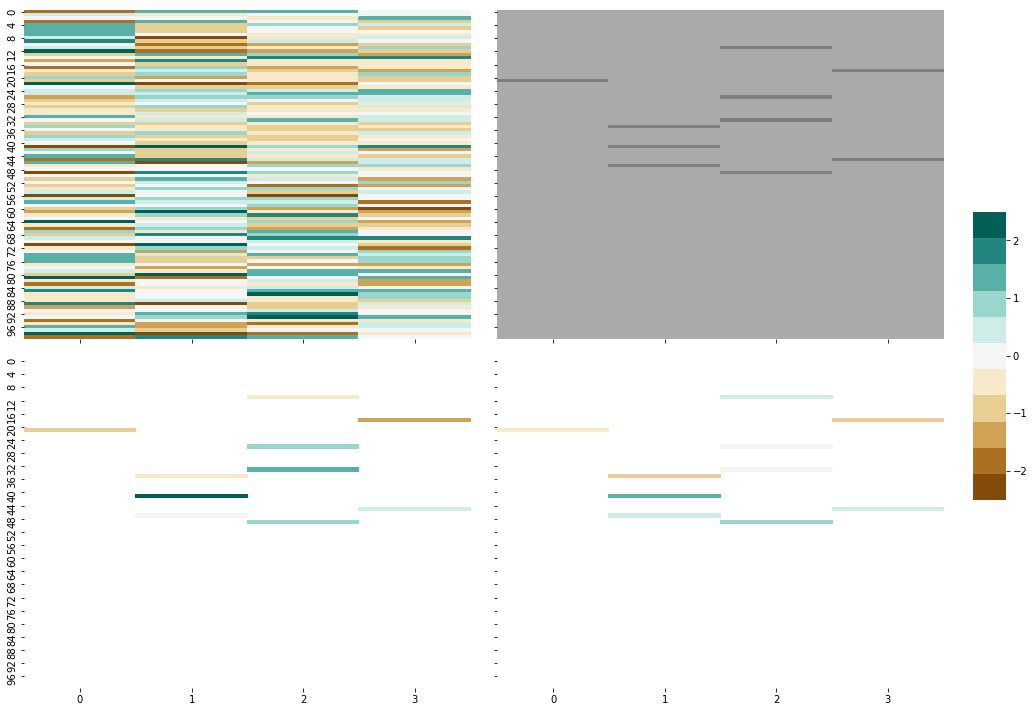

In [184]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

missing = np.isnan(X_incomplete)

fig, axn = plt.subplots(2, 2, figsize=(15, 10), sharex=True, sharey=True)

fig.tight_layout(rect=[0, 0, .9, 1])
ax = axn.flat

cbar_ax = fig.add_axes([.91, .3, .03, .4])

amap = sns.color_palette("BrBG", 11)

sns.heatmap(X, ax=ax[0], cmap=amap, vmin=-2.5, vmax=2.5, cbar_ax=None, cbar=False)

temp = missing 
sns.heatmap(missing, ax=ax[1], cmap=sns.color_palette("gray_d", 3,), vmin=-2.5, vmax=2.5, cbar_ax=cbar_ax, cbar=True)

temp = X.copy()
temp[~missing] = np.nan
sns.heatmap(temp, ax=ax[2], cmap=amap, vmin=-2.5, vmax=2.5, cbar_ax=cbar_ax, cbar=True)

temp = X_filled_knn.copy()
temp[~missing] = np.nan
sns.heatmap(temp, ax=ax[3], cmap=amap, vmin=-2.5, vmax=2.5, cbar_ax=cbar_ax, cbar=True)

### Filling-in Voting Data

Imputing row 1/80 with 1 missing, elapsed time: 0.004


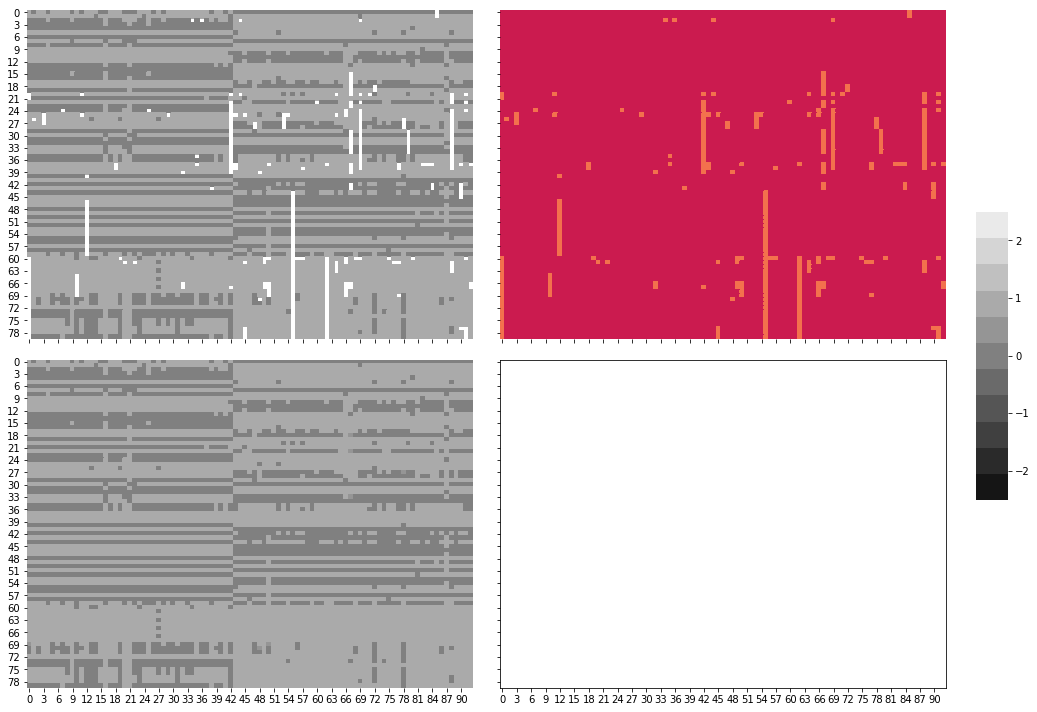

In [217]:
histX = hist.values.copy().astype(np.float32)
missing = np.isnan(histX)

histX_filled = KNN(k=5).complete(histX)

fig, axn = plt.subplots(2, 2, figsize=(15, 10), sharex=True, sharey=True)

fig.tight_layout(rect=[0, 0, .9, 1])
ax = axn.flat

cbar_ax = fig.add_axes([.91, .3, .03, .4])

amap = sns.color_palette("gray", 11)

sns.heatmap(histX, ax=ax[0], cmap=amap, vmin=-2.5, vmax=2.5, cbar_ax=None, cbar=False)

sns.heatmap(missing, ax=ax[1], vmin=-2.5, vmax=2.5, cbar_ax=cbar_ax, cbar=True)

temp = histX.copy()
temp[~missing] = np.nan
sns.heatmap(histX_filled, ax=ax[2], cmap=amap, vmin=-2.5, vmax=2.5, cbar_ax=cbar_ax, cbar=True)

# temp = X_filled_knn.copy()
# temp[~missing] = np.nan
# sns.heatmap(temp, ax=ax[3], cmap=amap, vmin=-2.5, vmax=2.5, cbar_ax=cbar_ax, cbar=True)

### Transforming Yes-No votes

Different proportion of Yes votes effect calculation of underlying relationships. So we standardize each person's yes/no vote as if they were numeric attributes. This can be done if we are not interested in interpreting the values in the estimator.

In [221]:
x = histX_filled.copy()
x -= x.mean(axis=0)
x /= x.std(axis=0)

In [222]:
x

array([[ 0.8299521 , -1.2572372 ,  0.8164967 , ..., -1.5742497 ,
        -1.4411533 , -1.4010574 ],
       [ 0.8299521 ,  0.79539496,  0.8164967 , ...,  0.6352236 ,
         0.6938886 ,  0.71374613],
       [-1.2199458 , -1.2572372 , -1.2247452 , ...,  0.6352236 ,
         0.6938886 ,  0.71374613],
       ...,
       [ 0.8299521 ,  0.79539496,  0.8164967 , ...,  0.6352234 ,
         0.6938886 ,  0.71374613],
       [ 0.8299521 ,  0.79539496,  0.8164967 , ...,  0.6352236 ,
         0.6938886 ,  0.71374613],
       [-1.2199458 , -1.2572372 , -1.2247452 , ...,  0.6352236 ,
         0.6938886 ,  0.71374613]], dtype=float32)

In [223]:
from sklearn.covariance import GraphicalLassoCV

model = GraphicalLassoCV(cv=5)
model.fit(x)
cov_ = model.covariance_
prec_ = model.precision_


/opt/conda/lib/python3.6/site-packages/sklearn/covariance/graph_lasso_.py:265: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: -5.927e-04
  % (max_iter, d_gap), ConvergenceWarning)


In [224]:
preccopy = prec_.copy()
np.fill_diagonal(preccopy, 0)

In [237]:
# fig, axn = plt.subplots(2, 2, figsize=(15, 10), sharex=True, sharey=True)
plt.figure(figsize=(20,10))
df = pd.DataFrame(preccopy, index=hist.columns, columns=hist.columns)

<Figure size 1440x720 with 0 Axes>

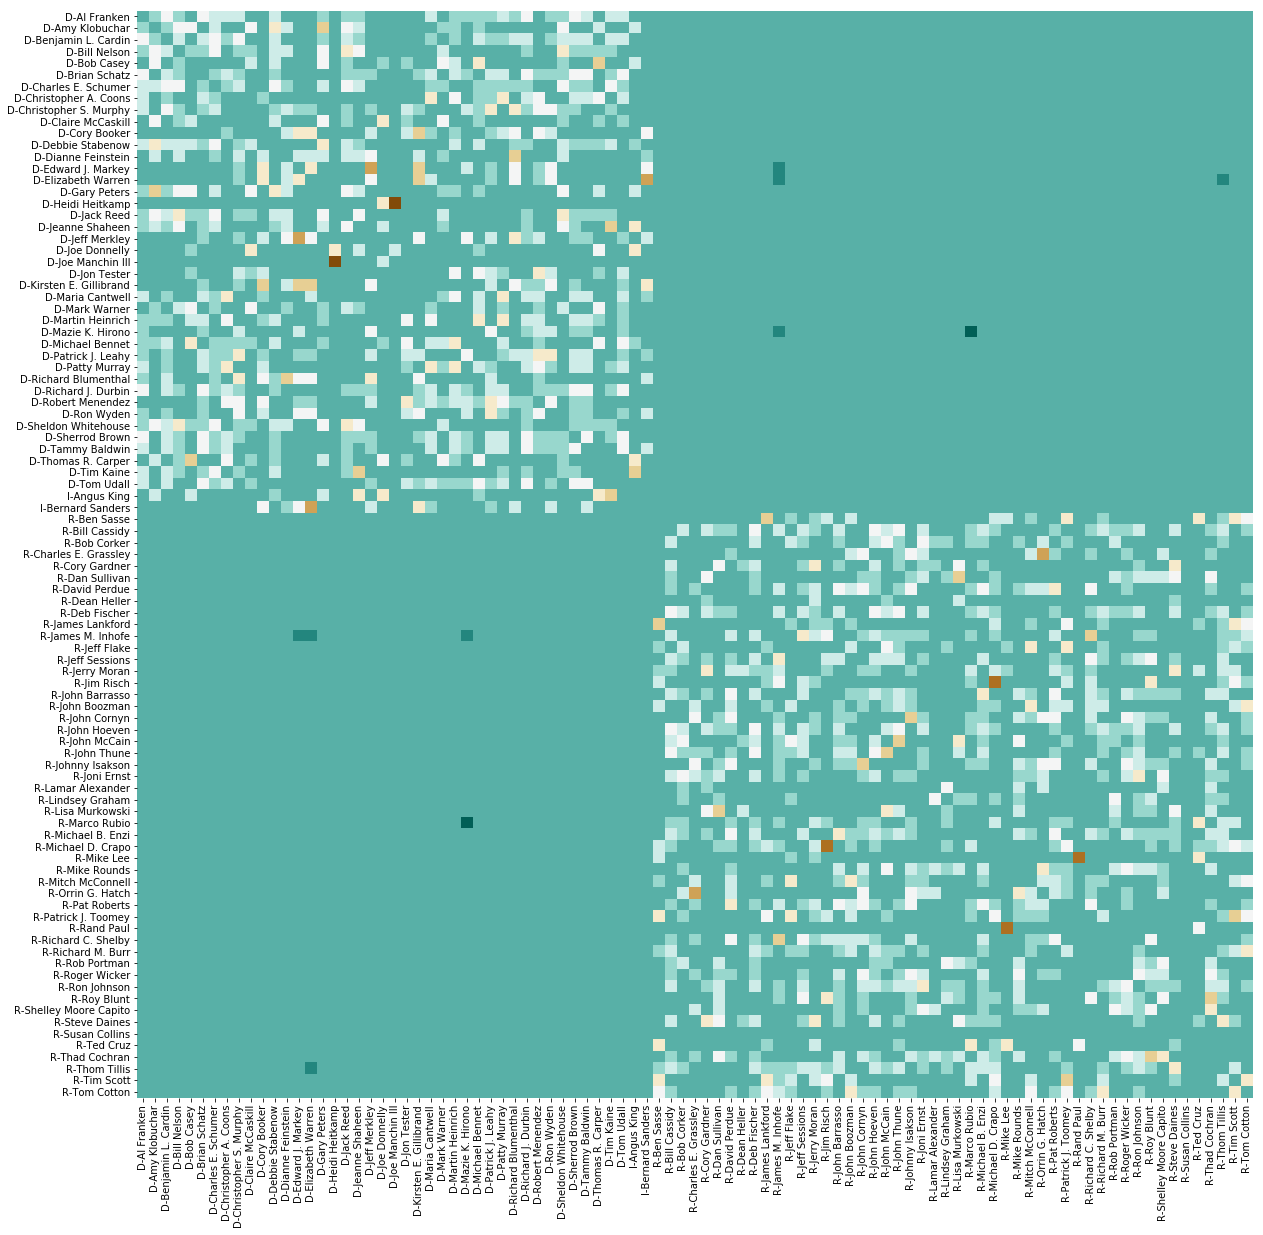

In [239]:
plt.figure(figsize=(20,20))
sns.heatmap(df, cmap=sns.color_palette("BrBG", 11), cbar=False)

In [240]:
!pip install plotly

     |████████████████████████████████| 41.5MB 653kB/s eta 0:00:01
  Stored in directory: /home/jovyan/.cache/pip/wheels/d7/a9/33/acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying


In [247]:
import plotly.plotly as py
import plotly.graph_objs as go

import plotly

plotly.offline.init_notebook_mode(connected=True)

trace = go.Heatmap(z=[[1, 20, 30, 50, 1], [20, 1, 60, 80, 30], [30, 60, 1, -10, 20]],
                   x=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'],
                   y=['Morning', 'Afternoon', 'Evening'])
data=[trace]
plotly.offline.iplot(data, filename='labelled-heatmap')

In [248]:
trace = go.Heatmap(z=df,
                   x=df.columns,
                   y=df.columns)
data=[trace]
plotly.offline.iplot(data, filename='labelled-heatmap')